# 互评作业4: 离群点分析与异常检测
> [github 仓库地址](https://github.com/ezeli/DataMining_BIT)

## 一、数据集
### 1、abalone 数据集
包含1725个benchmark。

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../data/anomaly_detection/abalone/benchmarks/abalone_benchmark_0001.csv', index_col=0)
print('abalone benchmark 0001')
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

abalone benchmark 0001
属性类别数: 12
总行数: 1888
示例数据:


,motherset,origin,original.label,diff.score,ground.truth,V1,V2,V3,V4,V5,V6,V7
point.id,,,,,,,,,,,,
abalone_point_1584,abalone,regression,7,0.153312,nominal,-0.116511,-0.129799,-0.227518,-0.461352,-0.353066,-0.342963,-0.551935
abalone_point_0315,abalone,regression,23,0.202253,anomaly,0.882716,0.777094,0.848341,0.960988,0.333986,1.039157,1.588828
abalone_point_1779,abalone,regression,8,0.562701,nominal,-0.283048,-0.532863,0.489721,0.103505,-0.048961,0.313886,0.313709
abalone_point_1926,abalone,regression,11,0.209155,anomaly,0.716178,0.625945,0.609261,0.713225,0.930932,0.893190,0.396322
abalone_point_0588,abalone,regression,13,0.163268,anomaly,0.216565,0.021350,0.131102,-0.000494,-0.224666,0.090375,0.080237


其中 ground.truth 作为标签表示该样本是否为离群点，并且采用 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7' 七个属性构成一个特征向量作为训练数据。

### 2、skin 数据集
包含1500个benchmark。

In [3]:
data = pd.read_csv('../data/anomaly_detection/skin/benchmarks/skin_benchmark_0001.csv', index_col=0)
print('skin benchmark 0001')
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

skin benchmark 0001
属性类别数: 8
总行数: 6000
示例数据:


,motherset,origin,original.label,diff.score,ground.truth,R,G,B
point.id,,,,,,,,
skin_point_117027,skin,binary,2,0.020405,nominal,-1.864336,-2.110524,-1.587289
skin_point_016927,skin,binary,1,0.000250,anomaly,0.384456,0.925785,1.747782
skin_point_240995,skin,binary,2,0.001285,nominal,-0.980882,-1.092860,-1.394351
skin_point_018861,skin,binary,1,0.000739,anomaly,-1.125447,-0.542320,0.383435
skin_point_087883,skin,binary,2,0.001053,nominal,-0.964819,-1.076177,-1.380570


其中 ground.truth 作为标签表示该样本是否为离群点，并且采用 'R', 'G', 'B' 三个属性构成一个特征向量作为训练数据。

## 二、离群点检测
### 1、模型和指标
采用 **pyod** 库中自带的 *'KNN largest', 'KNN mean', 'KNN median', 'CBLOF', 'LOF', 'FeatureBagging', 'HBOS', 'IForest', 'MCD', 'OCSVM', 'PCA'* 11个模型分别对上述两个数据集进行离群点检测。

采用 **roc-auc 得分** 作为评价指标。

### 2、代码说明
模型训练代码为当前目录下的 **main.py** 文件，调整代码中 `opt` 变量的数据集目录和数据集属性参数即可直接运行代码：*python main.py*，也可以修改 `models` 变量增加和删除所采用的训练模型。

### 3、检测结果
#### 1）abalone 数据集

In [4]:
df = pd.read_csv('./result/abalone/result.csv')
len(df)

1725

由于数据量较大，采用随机采样的方式进行展示。

In [5]:
sample_df = df.sample(n=20)
sample_df

,benchmark,KNN largest,KNN mean,KNN median,CBLOF,LOF,FeatureBagging,HBOS,IForest,MCD,OCSVM,PCA
739,abalone_benchmark_0810.csv,0.819035,0.810286,0.807609,0.731972,0.695758,0.691198,0.678871,0.710127,0.792683,0.704666,0.640615
37,abalone_benchmark_0038.csv,0.778905,0.779604,0.774707,0.606817,0.585408,0.580789,0.485136,0.512748,0.750837,0.511964,0.478166
1125,abalone_benchmark_1201.csv,0.851885,0.849183,0.849748,0.734677,0.686373,0.681697,0.780178,0.753680,0.854380,0.710673,0.696845
276,abalone_benchmark_0282.csv,0.326080,0.324641,0.326613,0.380743,0.346840,0.340314,0.497502,0.433578,0.370437,0.438646,0.494578
205,abalone_benchmark_0211.csv,0.720547,0.718885,0.714286,0.584850,0.561468,0.554720,0.495419,0.504911,0.703642,0.507862,0.487111
1289,abalone_benchmark_1365.csv,0.861490,0.859968,0.859539,0.761888,0.710154,0.718065,0.813014,0.750429,0.871564,0.756580,0.737450
1408,abalone_benchmark_1484.csv,0.247921,0.229992,0.232814,0.405599,0.317333,0.284461,0.538495,0.425945,0.321712,0.464945,0.509363
1116,abalone_benchmark_1192.csv,0.297624,0.275081,0.280818,0.344440,0.382980,0.382760,0.600471,0.536555,0.326787,0.534569,0.573330
1254,abalone_benchmark_1330.csv,0.853770,0.854083,0.852503,0.733828,0.682566,0.682874,0.807367,0.780923,0.863229,0.754056,0.732476
397,abalone_benchmark_0463.csv,0.950027,0.950159,0.956522,0.595175,0.675239,0.661453,0.943134,0.920467,0.960498,0.938494,0.914899


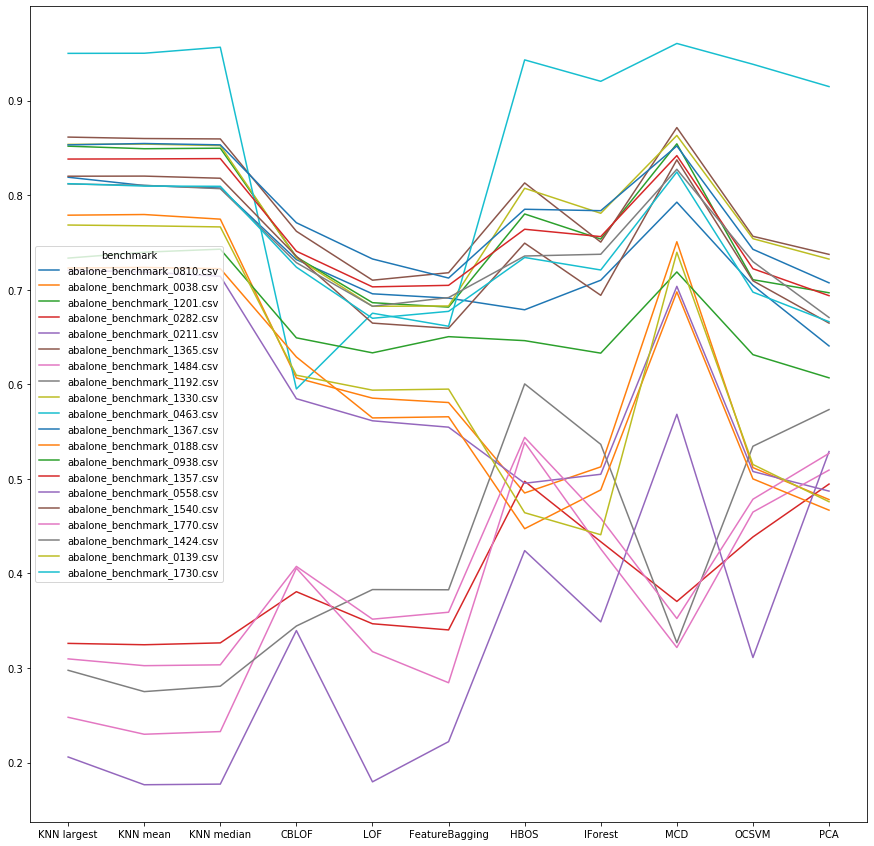

In [6]:
sample_df_T = sample_df.set_index(['benchmark'], inplace=False).T
sample_df_T.plot(xticks=[i for i in range(len(sample_df_T.index))],figsize=[15, 15])

通过表格和折线图可以看出：一般来说，对于该数据集，KNN、HBOS、MCD 模型的检测效果较好。

#### 2）skin 数据集

In [7]:
df = pd.read_csv('./result/skin/result.csv')
len(df)

1500

In [8]:
sample_df = df.sample(n=20)
sample_df

,benchmark,KNN largest,KNN mean,KNN median,CBLOF,LOF,FeatureBagging,HBOS,IForest,MCD,OCSVM,PCA
1080,skin_benchmark_1261.csv,0.853685,0.851185,0.850949,0.788436,0.450061,0.409406,0.718092,0.838969,0.895177,0.872836,0.570635
854,skin_benchmark_0975.csv,0.940063,0.933967,0.930979,0.913137,0.485873,0.580185,0.753549,0.892604,0.882668,0.890547,0.600426
1491,skin_benchmark_1732.csv,0.483533,0.473166,0.474363,0.553666,0.467229,0.474095,0.348904,0.371272,0.482538,0.239602,0.407744
361,skin_benchmark_0362.csv,0.983178,0.988600,0.989156,0.920309,0.709042,0.765933,0.780030,0.905767,0.880936,0.908436,0.717912
909,skin_benchmark_1030.csv,0.912633,0.908751,0.899877,0.820469,0.525247,0.574787,0.659349,0.704675,0.762259,0.663246,0.406296
56,skin_benchmark_0057.csv,0.726696,0.722642,0.724288,0.651957,0.434979,0.442020,0.601523,0.656458,0.891891,0.529264,0.443997
239,skin_benchmark_0240.csv,0.292328,0.293217,0.304598,0.321314,0.450097,0.411341,0.176656,0.246308,0.222901,0.214678,0.374910
795,skin_benchmark_0916.csv,0.936444,0.933479,0.931150,0.922239,0.508575,0.488715,0.761062,0.882009,0.893460,0.898246,0.570640
111,skin_benchmark_0112.csv,0.723228,0.716442,0.715409,0.734317,0.421634,0.438375,0.602765,0.678436,0.892325,0.557098,0.444347
428,skin_benchmark_0429.csv,0.984790,0.989489,0.987988,0.851268,0.807780,0.790513,0.708959,0.733317,0.737654,0.565204,0.316761


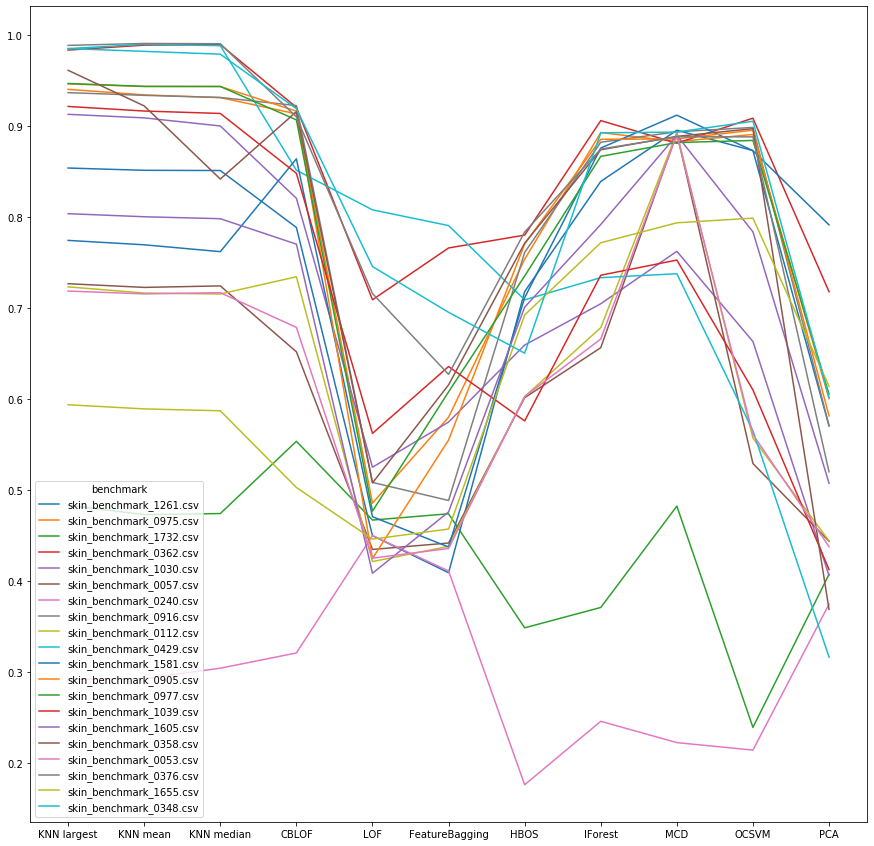

In [9]:
sample_df_T = sample_df.set_index(['benchmark'], inplace=False).T
sample_df_T.plot(xticks=[i for i in range(len(sample_df_T.index))],figsize=[15, 15])

通过表格和折线图可以看出：一般来说，对于该数据集，KNN、IForest、OCSVM 模型的检测效果较好。